In [1]:
import pandas as pd

In [2]:
s_file = pd.ExcelFile('市町村別決算状況編集済み.xls')
for s_sheet in s_file.sheet_names:
    s_df = s_file.parse(s_sheet)

In [3]:
s_df.head()

,団体コード,団体名,住民基本台帳登載人口,住民基本台帳うち日本人,平27国勢調査人口,対平22増減率,産業構造(22年国調)第一次,産業構造(22年国調)第二次,産業構造(22年国調)第三次,面積(㎢),...,歳入総額,歳出総額,歳入歳出差引額,翌年度に繰り越すべき財源,実質収支,単年度収支,積立金,繰上償還金,積立金取崩し額,実質単年度収支
0,NaN,北 海 道,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11002.0,札幌市,1941832.0,1931518.0,1952356.0,2.0,0.5,15.2,84.3,1121.26,...,885032369.0,877817401.0,7214968.0,3223669.0,3991299.0,-620649.0,6048.0,NaN,NaN,-614601.0
2,12025.0,函館市,268617.0,267751.0,265979.0,-4.7,3.8,17.8,78.4,677.86,...,140294201.0,137520941.0,2773260.0,373278.0,2399982.0,-278885.0,1340780.0,10932.0,NaN,1072827.0
3,12033.0,小樽市,122927.0,122438.0,121924.0,-7.6,1.4,18.2,80.4,243.83,...,58910972.0,56913539.0,1997433.0,74950.0,1922483.0,1421936.0,321919.0,NaN,NaN,1743855.0
4,12041.0,旭川市,345288.0,344500.0,339605.0,-2.2,2.8,17.7,79.5,747.66,...,158551128.0,157272163.0,1278965.0,326697.0,952268.0,-250928.0,17063.0,NaN,1000000.0,-1233865.0


In [4]:
s_df.dtypes

団体コード                                     float64
団体名                                        object
住民基本台帳登載人口                                float64
住民基本台帳うち日本人                               float64
平27国勢調査人口                                 float64
対平22増減率                                   float64
産業構造(22年国調)第一次                            float64
産業構造(22年国調)第二次                            float64
産業構造(22年国調)第三次                            float64
面積(㎢)                                     float64
基準財政需要額                                   float64
基準財政収入額                                   float64
標準財政規模                                    float64
臨時財政対策債発行可能額                              float64
実質収支比率                                    float64
経常収支比率                                    float64
人件費                                       float64
公債費                                       float64
減収補塡債(特例分)及び臨時財政対策債を経常一般財源等から除いた経常収支比率    float64
公債費負担比率                                   float64


In [5]:
print('全体の行数:',len(s_df))
s_df.isnull().sum()

全体の行数: 959


団体コード                                     146
団体名                                        47
住民基本台帳登載人口                                 94
住民基本台帳うち日本人                                94
平27国勢調査人口                                  94
対平22増減率                                    94
産業構造(22年国調)第一次                             94
産業構造(22年国調)第二次                             94
産業構造(22年国調)第三次                             94
面積(㎢)                                      94
基準財政需要額                                   118
基準財政収入額                                   118
標準財政規模                                    118
臨時財政対策債発行可能額                              145
実質収支比率                                    118
経常収支比率                                     94
人件費                                        94
公債費                                        94
減収補塡債(特例分)及び臨時財政対策債を経常一般財源等から除いた経常収支比率     94
公債費負担比率                                    94
財政力指数                                     118
実質赤字比率                            

In [6]:
print('dropna 実行前:',len(s_df))
s_df.dropna(subset=['財政力指数'],inplace=True)
print('dropna 実行後:',len(s_df))
s_df.isnull().sum()

dropna 実行前: 959
dropna 実行後: 841


団体コード                                      51
団体名                                         0
住民基本台帳登載人口                                  0
住民基本台帳うち日本人                                 0
平27国勢調査人口                                   0
対平22増減率                                     0
産業構造(22年国調)第一次                              0
産業構造(22年国調)第二次                              0
産業構造(22年国調)第三次                              0
面積(㎢)                                       0
基準財政需要額                                     0
基準財政収入額                                     0
標準財政規模                                      0
臨時財政対策債発行可能額                               27
実質収支比率                                      0
経常収支比率                                      0
人件費                                         0
公債費                                         0
減収補塡債(特例分)及び臨時財政対策債を経常一般財源等から除いた経常収支比率      0
公債費負担比率                                     0
財政力指数                                       0
実質赤字比率                            

In [7]:
s_df.set_index('団体コード',inplace=True)

In [8]:
s_df.head()

,団体名,住民基本台帳登載人口,住民基本台帳うち日本人,平27国勢調査人口,対平22増減率,産業構造(22年国調)第一次,産業構造(22年国調)第二次,産業構造(22年国調)第三次,面積(㎢),基準財政需要額,...,歳入総額,歳出総額,歳入歳出差引額,翌年度に繰り越すべき財源,実質収支,単年度収支,積立金,繰上償還金,積立金取崩し額,実質単年度収支
団体コード,,,,,,,,,,,,,,,,,,,,,
11002.0,札幌市,1941832.0,1931518.0,1952356.0,2.0,0.5,15.2,84.3,1121.26,326840745.0,...,885032369.0,877817401.0,7214968.0,3223669.0,3991299.0,-620649.0,6048.0,NaN,NaN,-614601.0
12025.0,函館市,268617.0,267751.0,265979.0,-4.7,3.8,17.8,78.4,677.86,58883567.0,...,140294201.0,137520941.0,2773260.0,373278.0,2399982.0,-278885.0,1340780.0,10932.0,NaN,1072827.0
12033.0,小樽市,122927.0,122438.0,121924.0,-7.6,1.4,18.2,80.4,243.83,27497809.0,...,58910972.0,56913539.0,1997433.0,74950.0,1922483.0,1421936.0,321919.0,NaN,NaN,1743855.0
12041.0,旭川市,345288.0,344500.0,339605.0,-2.2,2.8,17.7,79.5,747.66,67224590.0,...,158551128.0,157272163.0,1278965.0,326697.0,952268.0,-250928.0,17063.0,NaN,1000000.0,-1233865.0
12050.0,室蘭市,88618.0,88302.0,88564.0,-6.3,1.0,27.4,71.6,80.88,18688855.0,...,46451973.0,45582620.0,869353.0,208756.0,660597.0,-184802.0,308230.0,NaN,456656.0,-333228.0


In [9]:
s_df.describe().round(1)

,住民基本台帳登載人口,住民基本台帳うち日本人,平27国勢調査人口,対平22増減率,産業構造(22年国調)第一次,産業構造(22年国調)第二次,産業構造(22年国調)第三次,面積(㎢),基準財政需要額,基準財政収入額,...,歳入総額,歳出総額,歳入歳出差引額,翌年度に繰り越すべき財源,実質収支,単年度収支,積立金,繰上償還金,積立金取崩し額,実質単年度収支
count,841.0,841.0,841.0,841.0,841.0,841.0,841.0,841.0,8.410000e+02,8.410000e+02,...,8.410000e+02,8.410000e+02,8.410000e+02,841.0,8.410000e+02,841.0,836.0,258.0,430.0,841.0
mean,471841.5,463733.5,469511.8,-2.7,6.7,27.4,66.0,821.9,7.678427e+07,5.824319e+07,...,2.056010e+08,1.990370e+08,6.563927e+06,1982348.5,4.581578e+06,493260.6,1571221.8,902578.0,2273821.5,1169435.7
std,4270127.6,4193218.0,4250216.8,3.8,6.1,7.4,8.7,7611.8,6.761773e+08,5.123535e+08,...,1.861115e+09,1.800785e+09,6.143074e+07,18777890.8,4.327549e+07,4647559.4,15344675.1,4678561.1,14771702.5,12022449.1
min,3664.0,3660.0,3585.0,-19.0,0.1,11.3,41.4,5.1,2.295735e+06,2.485660e+05,...,4.654021e+06,4.517704e+06,3.870900e+04,1.0,6.909000e+03,-6022183.0,25.0,40.0,20.0,-6135272.0
25%,44117.0,43389.0,42935.0,-5.2,2.0,21.8,59.4,77.2,9.301677e+06,4.557817e+06,...,2.175160e+07,2.075106e+07,7.523330e+05,79518.0,5.802310e+05,-28422.0,11874.5,23747.2,214416.0,-19584.0
50%,72713.0,71659.0,72211.0,-2.6,4.6,26.8,65.3,194.5,1.364186e+07,8.510247e+06,...,3.212123e+07,3.086628e+07,1.226850e+06,184704.0,9.726810e+05,102782.0,225131.0,218978.0,521355.0,273770.0
75%,152197.0,148551.0,149765.0,-0.2,9.5,32.3,72.6,459.2,2.544211e+07,1.875676e+07,...,6.448517e+07,6.164664e+07,2.446743e+06,471965.0,1.928585e+06,343328.0,658765.8,763115.2,1174123.5,751867.0
max,116769262.0,114702367.0,116137232.0,10.7,33.8,51.8,87.9,216958.8,1.851917e+10,1.377802e+10,...,5.097888e+10,4.925606e+10,1.722829e+09,506551186.0,1.216278e+09,129100593.0,424816820.0,73328192.0,295646846.0,331598759.0


In [10]:
s_df['財政力指数'].plot.hist(bins=20,grid=True,figsize=(8,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E2DF97D30>,
      dtype=object)

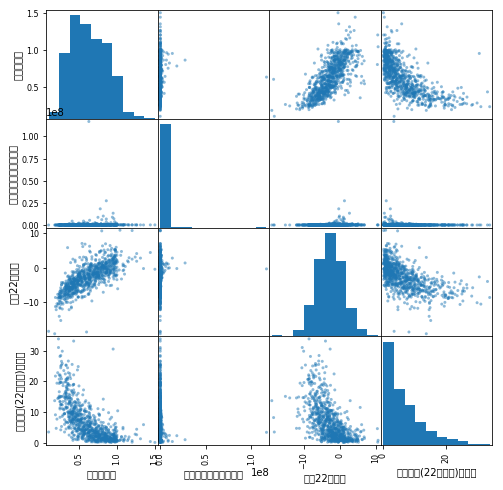

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(s_df[['財政力指数','住民基本台帳登載人口','対平22増減率','産業構造(22年国調)第一次']],figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E3259D588>,
      dtype=object)

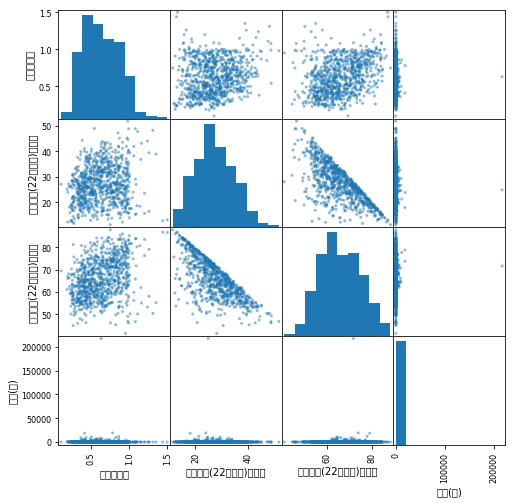

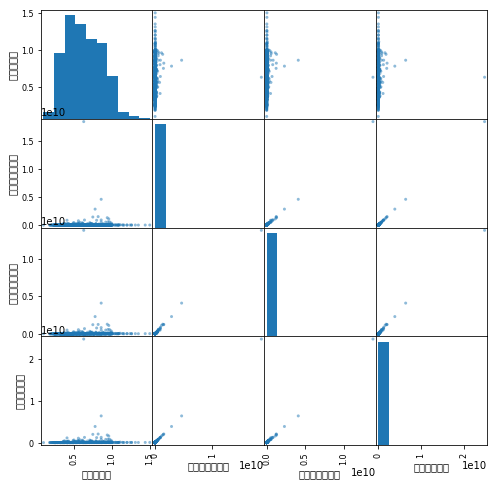

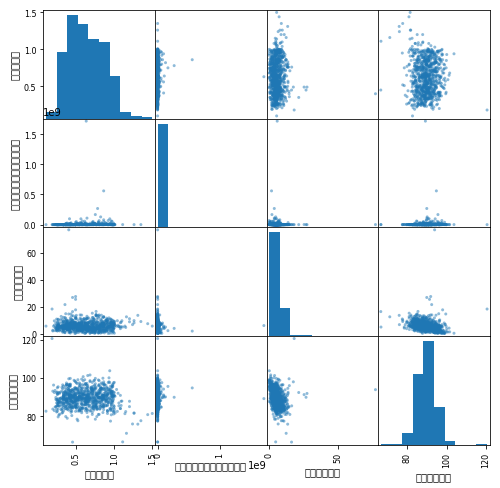

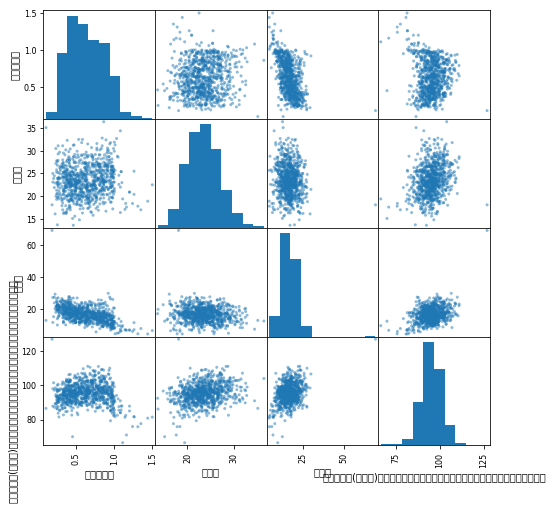

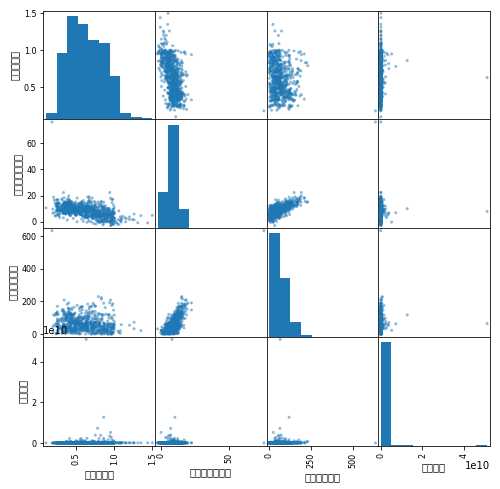

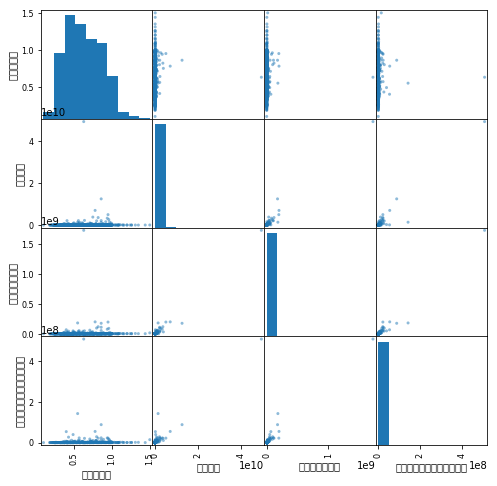

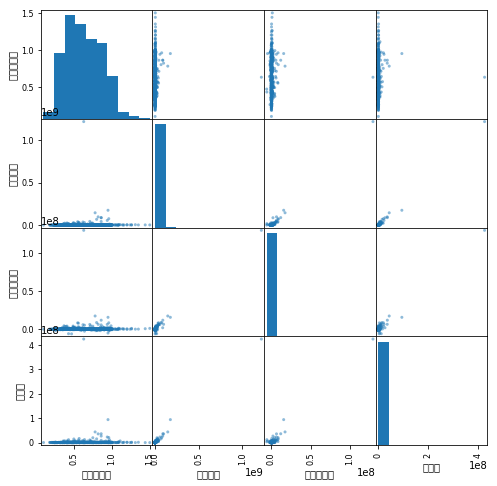

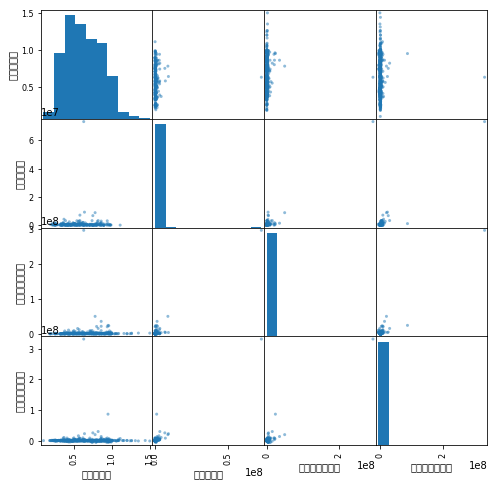

In [12]:
scatter_matrix(s_df[['財政力指数','産業構造(22年国調)第二次','産業構造(22年国調)第三次','面積(㎢)']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','基準財政需要額','基準財政収入額','標準財政規模']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','臨時財政対策債発行可能額','実質収支比率','経常収支比率']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','人件費','公債費','減収補塡債(特例分)及び臨時財政対策債を経常一般財源等から除いた経常収支比率']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','実質公債費比率','将来負担比率','歳入総額']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','歳出総額','歳入歳出差引額','翌年度に繰り越すべき財源']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','実質収支','単年度収支','積立金']],figsize=(8,8))
scatter_matrix(s_df[['財政力指数','繰上償還金','積立金取崩し額','実質単年度収支']],figsize=(8,8))

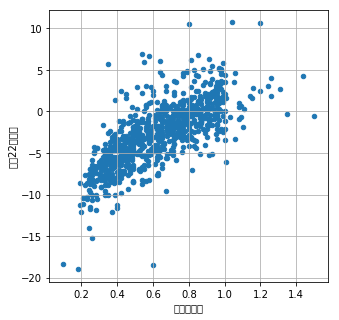

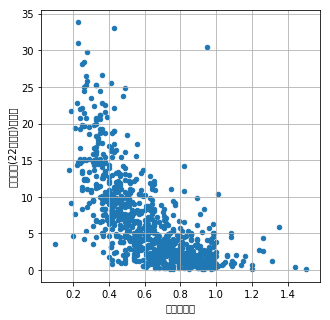

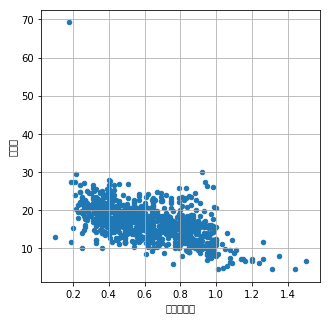

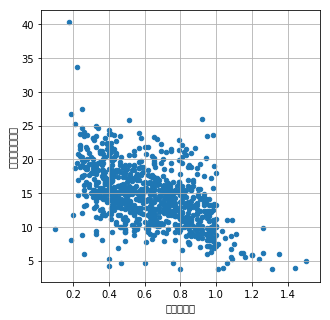

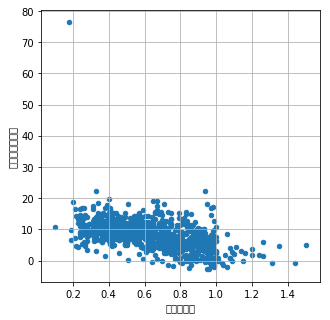

In [13]:
s_df.plot.scatter(x='財政力指数',y='対平22増減率',grid=True,figsize=(5,5))
s_df.plot.scatter(x='財政力指数',y='産業構造(22年国調)第一次',grid=True,figsize=(5,5))
s_df.plot.scatter(x='財政力指数',y='公債費',grid=True,figsize=(5,5))
s_df.plot.scatter(x='財政力指数',y='公債費負担比率',grid=True,figsize=(5,5))
s_df.plot.scatter(x='財政力指数',y='実質公債費比率',grid=True,figsize=(5,5))

In [14]:
s_df[['財政力指数','対平22増減率','産業構造(22年国調)第一次','公債費','公債費負担比率','実質公債費比率']].corr().round(6)

,財政力指数,対平22増減率,産業構造(22年国調)第一次,公債費,公債費負担比率,実質公債費比率
財政力指数,1.000000,0.723069,-0.680617,-0.534794,-0.515447,-0.487722
対平22増減率,0.723069,1.000000,-0.573451,-0.427003,-0.367832,-0.452963
産業構造(22年国調)第一次,-0.680617,-0.573451,1.000000,0.336229,0.325915,0.294418
公債費,-0.534794,-0.427003,0.336229,1.000000,0.922439,0.765749
公債費負担比率,-0.515447,-0.367832,0.325915,0.922439,1.000000,0.641390
実質公債費比率,-0.487722,-0.452963,0.294418,0.765749,0.641390,1.000000


In [15]:
from scipy.stats import pearsonr,linregress
pearsonr(s_df['財政力指数'],s_df['対平22増減率'])

(0.7230691888970515, 6.081635800286457e-137)

In [16]:
pearsonr(s_df['財政力指数'],s_df['産業構造(22年国調)第一次'])

(-0.680616730103373, 1.7762144866524994e-115)

In [17]:
SLOPE1,INTERCEPT1,rvalue1,pvalue1,stder1 = linregress(
    s_df['財政力指数'],
    s_df['対平22増減率'])
def get_対平22増減率(財政力指数):
    return 財政力指数 * SLOPE1 + INTERCEPT1

SLOPE2,INTERCEPT2,rvalue2,pvalue2,stder2 = linregress(
    s_df['財政力指数'],
    s_df['産業構造(22年国調)第一次'])
def get_産業構造第一次(財政力指数):
    return 財政力指数 * SLOPE2 + INTERCEPT2

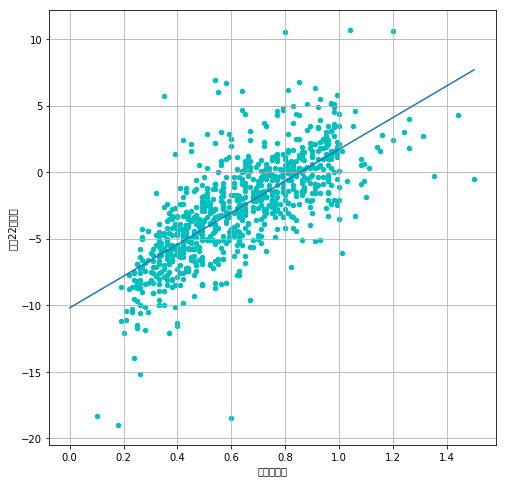

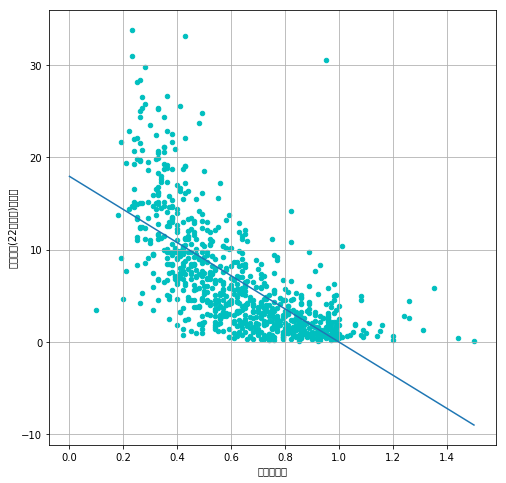

In [18]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(8,8))
ax1 = figure.add_subplot(111)
s_df.plot.scatter(ax=ax1,x='財政力指数',y='対平22増減率',grid=True,color='c')
max_財政力指数 = s_df['財政力指数'].max()
x = [0,max_財政力指数]
y = [get_対平22増減率(0),get_対平22増減率(max_財政力指数)]
ax1.plot(x,y)
plt.show()

figure = plt.figure(figsize=(8,8))
ax1 = figure.add_subplot(111)
s_df.plot.scatter(ax=ax1,x='財政力指数',y='産業構造(22年国調)第一次',grid=True,color='c')
x = [0,max_財政力指数]
y = [get_産業構造第一次(0),get_産業構造第一次(max_財政力指数)]
ax1.plot(x,y)
plt.show()

In [4]:
print('  以上のように、市町村別決算状況データの中で財政力指数と関係性が高い要因として、平成27年度国勢調査人口の対平成22年度比と平成22年度国勢調査産業構造における第一次産業割合を挙げた。この2項目は財政力指数と比較的大きな相関関係を示した項目の中で最も大きな相関係数を示した。互いに相関におけるp値も小さい値を示し、財政力指数との相関は有意であると考えられる。\n  平成27年度国勢調査人口の対平成22年度比については財政力指数と正の相関関係を示している。財政力指数が大きい豊かな市町村ほど人口が増加して様々な活動が活発化し、逆に小さい貧しい市町村ほど人口が減少し衰退化に向かっていることが伺える。これは納得のいく相関関係である。相関図の近似直線から、財政力指数が0.85を超えると人口が増加に転じ、0.85を下回ると減少に転じることも読み取ることができる。\n  平成22年度国勢調査産業構造における第一次産業割合については財政力指数と負の相関を示している。第一次産業の産業に占める割合の小さい都心部を主とした地域は豊かになり、第一次産業が主要な産業を占める地方部を主とした地域は貧しくなる傾向を読み取ることができる。ただし、この2項目はそれほど相関係数が大きくないので強い相関があるとは断言できない。しかしながら財政力指数が1を超える市町村は第一次産業の割合がほぼ5%を下回っており、第一次産業の割合が20%を超える市町村は財政力指数がほぼ0.5を下回っている。このことからも産業構造の違いによる市町村の貧富の差が生まれていることを伺うことができる。')

  以上のように、市町村別決算状況データの中で財政力指数と関係性が高い要因として、平成27年度国勢調査人口の対平成22年度比と平成22年度国勢調査産業構造における第一次産業割合を挙げた。この2項目は財政力指数と比較的大きな相関関係を示した項目の中で最も大きな相関係数を示した。互いに相関におけるp値も小さい値を示し、財政力指数との相関は有意であると考えられる。
  平成27年度国勢調査人口の対平成22年度比については財政力指数と正の相関関係を示している。財政力指数が大きい豊かな市町村ほど人口が増加して様々な活動が活発化し、逆に小さい貧しい市町村ほど人口が減少し衰退化に向かっていることが伺える。これは納得のいく相関関係である。相関図の近似直線から、財政力指数が0.85を超えると人口が増加に転じ、0.85を下回ると減少に転じることも読み取ることができる。
  平成22年度国勢調査産業構造における第一次産業割合については財政力指数と負の相関を示している。第一次産業の産業に占める割合の小さい都心部を主とした地域は豊かになり、第一次産業が主要な産業を占める地方部を主とした地域は貧しくなる傾向を読み取ることができる。ただし、この2項目はそれほど相関係数が大きくないので強い相関があるとは断言できない。しかしながら財政力指数が1を超える市町村は第一次産業の割合がほぼ5%を下回っており、第一次産業の割合が20%を超える市町村は財政力指数がほぼ0.5を下回っている。このことからも産業構造の違いによる市町村の貧富の差が生まれていることを伺うことができる。
